In [128]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
data = pd.read_csv("data/master.csv")
import time
pd.set_option('display.max_rows', 500)

In [23]:
d = {'Generation X':'42-57', \
     'Silent':'77-94', \
     'G.I. Generation':'95-121', \
     'Boomers':'58-76', \
     'Millenials':'26-41',\
     'Generation Z':'10-25'}

In [28]:
data["gen"] = data["generation"].apply(lambda x : d[x])
data = data.drop("generation", axis=1)

<AxesSubplot:>

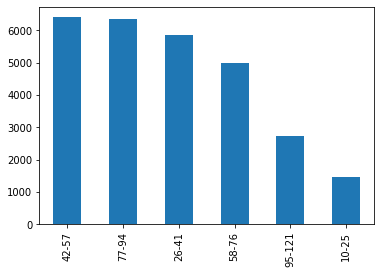

In [29]:
data.gen.value_counts().plot.bar()

In [56]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


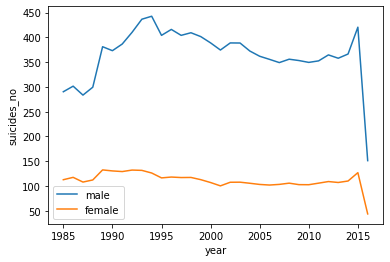

In [52]:
df_men = data[data.sex == "male"]
df_women = data[data.sex == "female"]
sns.lineplot(df_men.year, df_men.suicides_no, ci = None)
sns.lineplot(df_women.year, df_men.suicides_no, ci = None)
plt.legend(["male", 'female'])
plt.show()

In [78]:
df_1 = pd.DataFrame(data.groupby(["age", "country"]).sum().suicides_no).reset_index()

<AxesSubplot:ylabel='Frequency'>

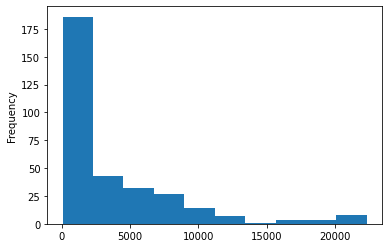

In [106]:
data[data["country"] == "Russian Federation"].suicides_no.plot.hist()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


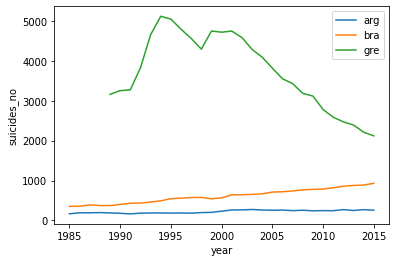

In [107]:
df_arg = data[data.country == "Argentina"]
df_bra = data[data.country == "Brazil"]
df_gre = data[data.country == "Russian Federation"]
sns.lineplot(df_arg.year, df_arg.suicides_no, ci = None)
sns.lineplot(df_bra.year, df_bra.suicides_no, ci = None)
sns.lineplot(df_gre.year, df_gre.suicides_no, ci = None)
plt.legend(["arg", 'bra', 'gre'])
plt.show()

In [103]:
# sns.countplot(x="country", data=df_1[df_1["country"].isin(["Brazil", "Argentina"])])
# for i in data.country.unique().tolist():
#     print(i)
#     df = data[data["country"] == i]
#     ax = sns.lineplot(x=df.year, y=df.suicides_no, ci = None)
#     plt.show()
#     time.sleep(1)
#     print("\n\n\n")

In [108]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [115]:
leo = data.groupby("country").sum().sort_values(by="suicides_no", ascending=False).reset_index()

In [120]:
# leo[["country", "suicides_no", "population"]].head(40)

In [122]:
leo["ratio"] = leo["suicides_no"] / leo["population"]

In [130]:
leo.sort_values(by="ratio", ascending=False)[["country", "ratio"]].head()

,country,ratio
33,Lithuania,0.000412
0,Russian Federation,0.000328
22,Sri Lanka,0.000305
21,Belarus,0.000303
17,Hungary,0.000297
